# Aufgabe 22 

### a)
Allgemein ist 
$$ \sigma_y = \sqrt{ \left(\frac{dy}{da_0}\sigma_{a_0}\right)^2 + \left(\frac{dy}{da_1}\sigma_{a_1}\right)^2 + 2\cdot \frac{dy}{da_0}\frac{dy}{da_1}\cdot\text{cov}(a_0,a_1)  }.$$
Damit ist
$$  \sigma_y = \sqrt{  (1\cdot 0,2)^2 + (x\cdot 0,2)^2 } = \sqrt{  0,04 + 0,04x^2 } =0,02\sqrt{1+x^2} $$ 
ohne Korrelation.
Mit Korrelation: $$  \sigma_y = \sqrt{  (1\cdot 0,2)^2 + (x\cdot 0,2)^2 +2\cdot 1\cdot x \cdot \text{cov}(a_0,a_1) }. $$
Die Kovarianz ist gegeben durch
$$ \text{cov}(a_0,a_1) = \rho \sigma_{a_0} \sigma_{a_1}. $$ 
Also: $$  \sigma_y = \sqrt{  (1\cdot 0,2)^2 + (x\cdot 0,2)^2 +2\cdot 1\cdot x \cdot 0.8\cdot 0.04 }. $$

# b)
Erstmal: Visualisierung der Parameter $a_0$ und $a_1$:

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
mean = [1,1]
cov = [[0.04, -0.032],[-0.032, 0.04]]
a_korr = np.random.multivariate_normal(mean, cov, 10000)
a_unkorr = np.random.multivariate_normal(mean, [[0.04,0],[0,0.04]], 10000)

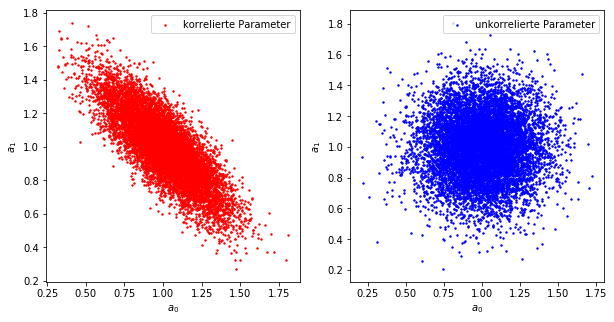

In [4]:
plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)
plt.scatter(a_korr[:,0],a_korr[:,1], s=2, color='r', label = 'korrelierte Parameter')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$a_1$')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(a_unkorr[:,0],a_unkorr[:,1], s=2, color='b', label = 'unkorrelierte Parameter')
plt.xlabel(r'$a_0$')
plt.ylabel(r'$a_1$')
plt.legend()

In [10]:
def y(x, a_0, a_1):
    return a_0 + a_1*x
def mean_y_korr(x):
    return np.mean(y(x, a_korr[:,0],a_korr[:,1]))
def sigma_y_korr(x):
    return np.std(y(x, a_korr[:,0],a_korr[:,1]))
def mean_y_unkorr(x):
    return np.mean(y(x, a_unkorr[:,0],a_unkorr[:,1]))
def sigma_y_unkorr(x):
    return np.std(y(x, a_unkorr[:,0],a_unkorr[:,1]))

In [24]:
list_korr=[]
for i in np.arange(-5,5,1e-1):
    list_korr.append(sigma_y_korr(i))
list_unkorr=[]
for i in np.arange(-5,5,1e-1):
    list_unkorr.append(sigma_y_unkorr(i))

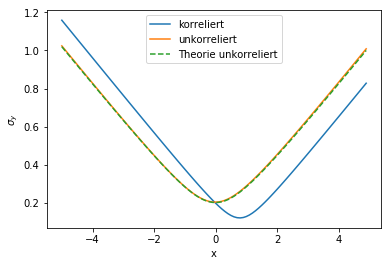

In [29]:
plt.plot(np.arange(-5,5,1e-1), list_korr, label='korreliert')
plt.plot(np.arange(-5,5,1e-1), list_unkorr, label='unkorreliert')
plt.plot(np.arange(-5,5,1e-1), np.sqrt(1+np.arange(-5,5,1e-1)**2)*0.2, linestyle='dashed', label='Theorie unkorreliert')
plt.xlabel('x')
plt.ylabel(r'$\sigma_y$')
plt.legend()

# c)

Die Werte der Funktion mit den korrelierten Parametern:

In [13]:
for i in [-3,0,3]:
    print('y(',i,') = ',mean_y_korr(i),' ± ',sigma_y_korr(i), sep='')

y(-3) = -1.9868700235848766 ± 0.7639393788325086
y(0) = 1.002384533791272 ± 0.19707609534988207
y(3) = 3.99163909116742 ± 0.456484683380674


Die Werte der Funktion mit den unkorrelierten Parametern:

In [78]:
for i in [-3,0,3]:
    print('y(',i,') = ',mean_y_unkorr(i),' ± ',sigma_y_unkorr(i), sep='')

y(-3) = -1.9951899717608543 ± 0.6359831799115244
y(0) = 0.9988021218419193 ± 0.20060738165462602
y(3) = 3.992794215444693 ± 0.6328621590307174


# Aufgabe 24


# a)  Designmatrix
Unser Modell lautet $$ f(\vec{x},\vec{a}) = a_1 \cos(x) + a_2 \sin(x). $$
Die Designmatrix ist daher $$ A = \begin{pmatrix}  \cos(\Psi_0) & \sin(\Psi_0) \\ 
 \cos(\Psi_1) & \sin(\Psi_1) \\
 ... & ... \\ 
  \cos(\Psi_n) & \sin(\Psi_n)\end{pmatrix}, $$ 
  der Lösungsvektor ist 
  $$ \begin{pmatrix} a_1 \\ a_2 \end{pmatrix}. $$

In [32]:
psi = np.array([0,30,60,90,120,150,180,210,240,270,300,330])
sin_psi = np.sin(np.deg2rad(psi))
cos_psi = np.cos(np.deg2rad(psi))

In [69]:
A = np.matrix(np.array([cos_psi, sin_psi]))
A = A.T
print('Die Designmatrix ist dann \n', A.round(2))

Die Designmatrix ist dann 
 [[ 1.    0.  ]
 [ 0.87  0.5 ]
 [ 0.5   0.87]
 [ 0.    1.  ]
 [-0.5   0.87]
 [-0.87  0.5 ]
 [-1.    0.  ]
 [-0.87 -0.5 ]
 [-0.5  -0.87]
 [-0.   -1.  ]
 [ 0.5  -0.87]
 [ 0.87 -0.5 ]]


# b) Lösungsvektor $\vec{a}$ für die Parameter nach der Methode der kleinsten Quadrate


In [63]:
y=np.matrix(np.array([-32,10,57,68,76,80,31,5,-41,-90,-88,-74]).reshape(-1,1)*1e-3)
trafo = np.linalg.inv(A.T*A)*A.T
a = trafo*y
print('Der Lösungsvektor ist gegeben durch ',a.round(4))

Der Lösungsvektor ist gegeben durch  [[-0.0375]
 [ 0.0774]]


# c) 
Die Kovarianzmatrix wird dann mit der BVB-Formel bestimmt:

In [67]:
cov_y = np.diag(0.011**2*np.ones(12))
cov_a = trafo*cov_y*trafo.T
print('Die Kovarianzmatrix ist damit \n', cov_a)

Die Kovarianzmatrix ist damit 
 [[ 2.01666667e-05 -1.27054942e-21]
 [-1.48230766e-21  2.01666667e-05]]


Fehler:

In [68]:
sigma_a = np.sqrt(np.diag(cov_a))
print('Die Standardabweichungen sind\n', sigma_a)

Die Standardabweichungen sind
 [0.00449073 0.00449073]


Korrelationskoeffizient:

In [70]:
rho = np.diag(cov_a, k=1) / (sigma_a[0]*sigma_a[1])
print('Der Korrelationskoeffizienz ist (im Prinzip) null: \n', rho)

Der Korrelationskoeffizienz ist (im Prinzip) null: 
 [-6.30024506e-17]


### d) 
$$ f(\Psi) = A_0 \cos(\Psi + \delta) = A_0 (\cos(\Psi)\cos(\delta) -\sin(\Psi)\sin(\delta) ) =: a`_1 \cos(x) + a`_2 \sin(x)$$ 
mit $$\delta = \arctan\left(\frac{a`_2}{a`_1}\right),\\ A_0 = \frac{a`_1}{\cos(\delta)}. $$

In [72]:
a_strich = a 
a_strich

matrix([[-0.0375063 ],
        [ 0.07739978]])